# **Assignment 2**
## **Convolutional Neural Networks (CNNS) for Image Classification**

In this assignment, we explore the capabilities of a popular deep learning architectures — Convolutional Neural Networks (CNNs) — by training them on various datasets and comparing their performance. While ANNs serve as a versatile model for a range of tasks, CNNs are specifically designed for handling spatial data, making them particularly effective for image classification problems. By evaluating these models, we aim to highlight their respective strengths, limitations, and suitability for different types of data, providing insights into their real-world applications.

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 1**
This block imports essential libraries needed for building and training a Convolutional Neural Network (CNN) with PyTorch, including data loading, transformations, and metrics for evaluation.
1) <blue>**torch**</blue>: The core PyTorch library, essential for all operations involving tensors, model creation, and training.
2) <blue>**torch.nn**</blue>: Contains modules to define neural network architectures.
3) <blue>**torch.optim**</blue>: Provides optimization algorithms like <green>**SGD (Stochastic Gradient Descent)**</green>, used during model training.
4) <blue>**torchvision.transforms**</blue>: A module for applying various image transformations, such as <green>**normalization**</green> or <green>**random cropping**</green>.
5) <blue>**DataLoader**</blue>: Used to efficiently load data in batches, critical for training deep learning models.
6) <blue>**sklearn.metrics**</blue>: Includes metrics to evaluate model performance, such as <green>**accuracy**</green> and <green>**precision**</green>.
7) <blue>**seaborn/matplotlib**</blue>: Libraries for <green>**visualization**</green>, typically used to visualize model performance metrics.


In [1]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 2**
This block configures the device (CPU or GPU) and applies data transformations to the images (conversion to tensors and normalization).
1) <blue>**torch.device**</blue>: Chooses the <green>**device**</green> to run computations on. If a <green>**GPU**</green> is available, the model will run on it; otherwise, it defaults to the CPU.
2) <blue>**transforms.Compose**</blue>: Combines multiple transformations to apply <green>**sequentially**</green> to the data.
3) <blue>**transforms.ToTensor()**</blue>: Converts the image from a <green>**PIL Image**</green> (or numpy array) to a PyTorch tensor.
4) <blue>**transforms.Normalize()**</blue>: Normalizes the pixel values of the image. Each <green>**channel (R, G, B)**</green> is normalized with a <blue>**mean**</blue> of <green>**0.5**</green> and a <blue>**standard deviation**</blue> of <green>**0.5**</green>, scaling the values to the range [-1, 1].

In [2]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

cuda


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 3**
This block is meant to load the CIFAR-10 dataset, though the actual dataset loading is marked as a TODO. It sets up data loaders for both the training and testing datasets.
1) <blue>**train_dataset/test_dataset**</blue>: These will eventually contain the training and testing datasets. The <blue>**torchvision.datasets.CIFAR10**</blue> class will likely be used here.
2) <blue>**train_loader**</blue>: Loads the training dataset in <blue>**batches**</blue> of <green>**64**</green> images and <green>**shuffles**</green> them to ensure randomness during training.
3) <blue>**test_loader**</blue>: Loads the test dataset in <blue>**batches**</blue> of <green>**64**</green> images but <green>**does not shuffle**</green> them since testing doesn't require randomization.

Note: Replace the placeholders **"None"** with the appropriate code to download the training and testing dataset.


In [3]:
# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root = "D:/Deep Learning Bootcamp/Computer Vision/Week2/Train_data",
                                 download = True,
                                 train = True,
                                 transform=transform)
test_dataset = datasets.CIFAR10(root = "D:/Deep Learning Bootcamp/Computer Vision/Week2/test_data",
                                 download = True,
                                 train = False,
                                 transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:16<00:00, 10.5MB/s] 


Extracting D:/Deep Learning Bootcamp/Computer Vision/Week2/Train_data\cifar-10-python.tar.gz to D:/Deep Learning Bootcamp/Computer Vision/Week2/Train_data


100%|██████████| 170M/170M [00:16<00:00, 10.4MB/s] 


Extracting D:/Deep Learning Bootcamp/Computer Vision/Week2/test_data\cifar-10-python.tar.gz to D:/Deep Learning Bootcamp/Computer Vision/Week2/test_data


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 4**
1) This code defines a simple <green>**feedforward artificial neural network (ANN)**</green> for classification.
2) The model has three fully connected layers <blue>**(fc1, fc2, fc3)**</blue>, and the final layer outputs predictions for <green>**10 classes** </green>.
3) The <green>**forward pass**</green> describes how the input data flows through the network
4) The input image is first <green>**flattened**</green>.
5) It passes through fully connected layers with <blue>**ReLU activation function**</blue>.

Note: Replace the placeholders **"None"** with the appropriate numbers of units and activation functions in each layer.

In [31]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        
        self.fc1 = nn.Linear(32*32*3, 4096)
        self.fc2 = nn.Linear(4096, 512)
        self.fc3 = nn.Linear(512, 10) 

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Flatten the input image
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 5**
1) The <blue>**ANN model**</blue> is instantiated and moved to the <green>**selected device (CPU or GPU)**</green>.
2) The loss function is set to <blue>**CrossEntropyLoss**</blue>, which is suitable for <green>**multi-class classification**</green> problems like in our case of CIFAR-10.
3) The optimizer is <blue>**Adam**</blue>, with a <blue>**learning rate**</blue> of <green>**0.001**</green>, used to adjust the model parameters during training based on gradients computed from the loss.

In [32]:
# Initialize the ANN model, loss function, and optimizer
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 6**
This code trains the neural network over a specified number of epochs (num_epochs).
For each batch of images and labels, the following steps are performed:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU or GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute the <green>**output predictions**</green>.
3) <blue>**Loss Calculation**</blue>: The loss between the predictions and true labels is computed and added to <blue>**ls_losses**</blue> for tracking.
4) <blue>**Backpropagation and Optimization**</blue>: Gradients are calculated using backpropagation, and the optimizer <green>**updates the model parameters**</green> based on these gradients.

Every 100 batches, the loss is printed to monitor training progress.

In [33]:
# Training loop
num_epochs = 10
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device).view(-1, 32*32*3)
        labels = labels.to(device)

        outputs = model_ann(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.detach().cpu().numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/782], Loss: 2.0886
Epoch [1/10], Step [200/782], Loss: 1.7106
Epoch [1/10], Step [300/782], Loss: 1.8709
Epoch [1/10], Step [400/782], Loss: 1.6259
Epoch [1/10], Step [500/782], Loss: 1.7914
Epoch [1/10], Step [600/782], Loss: 1.7575
Epoch [1/10], Step [700/782], Loss: 1.6328
Epoch [2/10], Step [100/782], Loss: 1.5616
Epoch [2/10], Step [200/782], Loss: 1.4297
Epoch [2/10], Step [300/782], Loss: 1.4727
Epoch [2/10], Step [400/782], Loss: 1.4645
Epoch [2/10], Step [500/782], Loss: 1.4435
Epoch [2/10], Step [600/782], Loss: 1.1867
Epoch [2/10], Step [700/782], Loss: 1.6971
Epoch [3/10], Step [100/782], Loss: 1.1567
Epoch [3/10], Step [200/782], Loss: 1.4671
Epoch [3/10], Step [300/782], Loss: 1.4812
Epoch [3/10], Step [400/782], Loss: 1.1883
Epoch [3/10], Step [500/782], Loss: 1.3820
Epoch [3/10], Step [600/782], Loss: 1.3092
Epoch [3/10], Step [700/782], Loss: 1.3154
Epoch [4/10], Step [100/782], Loss: 1.3563
Epoch [4/10], Step [200/782], Loss: 1.2702
Epoch [4/10

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 7**
1) This code plots the <blue>**training losses**</blue> that were recorded in <blue>**ls_losses**</blue> during training.
2) The <blue>**x-axis**</blue> represents the <green>**number of samples (batches)**</green> seen during training, and the <blue>**y-axis**</blue> shows the <green>**corresponding loss**</green>.
3) It provides a visual representation of how the <green>**model's loss decreases over time**</green>, indicating whether the training is progressing well.

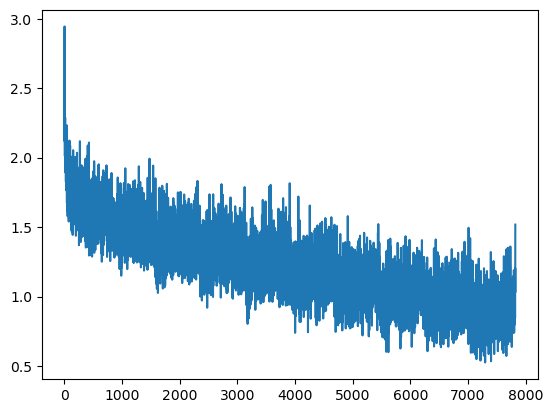

In [34]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>

### **Step - 8**
This block evaluates the model on the test dataset.\
<blue>**model.eval()**</blue> sets the model to <green>**evaluation mode**</green>, disabling dropout layers and stopping the computation of gradients to save memory and speed up computations.
For each batch of test images:
1) <blue>**Data Movement**</blue>: Images and labels are moved to the <green>**device (CPU/GPU)**</green>.
2) <blue>**Forward Pass**</blue>: Images pass through the network to compute <green>**predictions**</green>.
3) <blue>**Storing Results**</blue>: Predictions and true labels are saved to <green>**calculate metrics**</green> later.

This code also calculates key performance metrics to evaluate the model:
1) <blue>**Accuracy**</blue>: Percentage of correctly classified samples.
2) <blue>**Precision**</blue>: Proportion of true positive predictions out of all positive predictions.
3) <blue>**Recall**</blue>: Proportion of true positives out of actual positive samples.
4) <blue>**F1-Score**</blue>: <green>**Harmonic mean**</green> of precision and recall.
5) The <blue>**confusion matrix**</blue> is also calculated, showing the number of correct and incorrect predictions for each class. It is visualized using a <green>**heatmap**</green>, where the <blue>**rows**</blue> represent <green>**true labels**</green>, and the <blue>**columns**</blue> represent <green>**predicted labels**</green>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [35]:
# Test the model
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device).view(-1, 32*32*3) 
        labels = labels.to(device)

        outputs = model_ann(images)

        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann =precision_score(all_labels_ann, all_preds_ann, average = 'macro')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average = 'macro')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average = 'macro')

print(f"ANN Accuracy: {accuracy_ann:.3f}")
print(f"ANN Precision: {precision_ann:.3f}")
print(f"ANN Recall: {recall_ann:.3f}")
print(f"ANN F1-Score: {f1_ann:.3f}")

ANN Accuracy: 0.519
ANN Precision: 0.520
ANN Recall: 0.519
ANN F1-Score: 0.516


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 9**
This block defines a simple Convolutional Neural Network (CNN) architecture using PyTorch. The model will consist of convolutional layers, activation functions, pooling layers, and fully connected layers to classify images from the CIFAR-10 dataset.
1) <blue>**class CNN(nn.Module)**</blue>: This defines a custom CNN class that inherits from PyTorch's nn.Module, the base class for all neural networks in PyTorch.
2) <blue>**self.conv**</blue>: These define the two convolutional layers. The first takes an <blue>**input**</blue> with <green>**3 channels (RGB)**</green> and produces <green>**32**</green> <blue>**feature maps**</blue>. The second takes <green>**32**</green> <blue>**input channels**</blue> and produces <green>**64**</green> <blue>**feature maps**</blue>.
3) <blue>**self.pool**</blue>: A max-pooling layer that reduces the size of the feature maps by <green>**half (downsampling)**</green>. It takes the maximum value over a <green>**2x2**</green> <blue>**grid**</blue> with a <blue>**stride**</blue> of <green>**2**</green>.
4) <blue>**self.fc**</blue>: Fully connected layers. The first layer takes the flattened feature maps from the convolutional layers as input and <blue>**outputs**</blue> <green>**512**</green> features. The second layer maps the <green>**512**</green> <blue>**features**</blue> to <green>**10**</green> <blue>**output classes**</blue> (for the 10 CIFAR-10 categories).
5) <blue>**forward(self, x)**</blue>: This function defines how data flows through the network. It applies the convolutional layers, pooling, and fully connected layers in sequence.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Defining the CNN layers (Conv2D, MaxPool, Fully Connected)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8*8*64, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))  # First conv layer + relu activation + pool
        x = self.pool(nn.ReLU()(self.conv2(x)))  # Second conv layer + relu activation + pool
        x = x.view(-1, 8*8*64)  # Flatten the tensor (replace None with correct dimension)
        x = nn.ReLU()(self.fc1(x))  # Fully connected layer + relu activation
        x = self.fc2(x)  # Output layer
        return x


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 10**
This block defines the training loop for the CNN model. It will train the model over multiple epochs, compute the loss using cross-entropy, and optimize the model using an optimizer like SGD.
1) <blue>**optimizer.zero_grad()**</blue>: <green>**Clears**</green> the <blue>**gradients**</blue> from the previous iteration to prevent accumulation.
2) <blue>**loss.backward()**</blue>: Computes the <blue>**gradients**</blue> via <green>**backpropagation**</green>.
3) <blue>**optimizer.step()**</blue>: Updates the model's parameters based on the <green>**computed gradients**</green>.
4) <blue>**running_loss**</blue>: Keeps track of the <blue>**cumulative loss**</blue> for the epoch, which is divided by the <green>**number of batches**</green> to return the <blue>**average loss**</blue>.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [19]:
# Initialize the CNN model, loss function, and optimizer
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [100/782], Loss: 1.4363
Epoch [1/10], Step [200/782], Loss: 1.4308
Epoch [1/10], Step [300/782], Loss: 1.3201
Epoch [1/10], Step [400/782], Loss: 1.1942
Epoch [1/10], Step [500/782], Loss: 1.1651
Epoch [1/10], Step [600/782], Loss: 0.9091
Epoch [1/10], Step [700/782], Loss: 1.2498
Epoch [2/10], Step [100/782], Loss: 0.7927
Epoch [2/10], Step [200/782], Loss: 0.9414
Epoch [2/10], Step [300/782], Loss: 0.8976
Epoch [2/10], Step [400/782], Loss: 0.9346
Epoch [2/10], Step [500/782], Loss: 0.6534
Epoch [2/10], Step [600/782], Loss: 0.7334
Epoch [2/10], Step [700/782], Loss: 0.9431
Epoch [3/10], Step [100/782], Loss: 0.5091
Epoch [3/10], Step [200/782], Loss: 0.5839
Epoch [3/10], Step [300/782], Loss: 0.6138
Epoch [3/10], Step [400/782], Loss: 0.7555
Epoch [3/10], Step [500/782], Loss: 0.6481
Epoch [3/10], Step [600/782], Loss: 0.6981
Epoch [3/10], Step [700/782], Loss: 0.5315
Epoch [4/10], Step [100/782], Loss: 0.5313
Epoch [4/10], Step [200/782], Loss: 0.5358
Epoch [4/10

<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 11**
This code performs evaluation on the test set by moving data to the appropriate device, running the model to get predictions, and then calculating key performance metrics using the predicted and actual labels.
1) <blue>**model_cnn.eval()**</blue>: The code begins by setting the model to <green>**evaluation mode**</green> to ensure proper inference behavior.
2) <blue>**all_preds_cnn, all_labels_cnn**</blue>: These lists are initialized to store <green>**predicted**</green> and <green>**true labels**</green>, respectively.
3) <blue>**torch.no_grad()**</blue>: This is used to <green>**disable gradients**</green>, save memory and speed up computations, the test set is processed in batches from test_loader, where both images and labels are moved to the correct device.
6) After processing the test set, evaluation metrics such as <blue>**accuracy**</blue>, <blue>**precision**</blue>, <blue>**recall**</blue>, and <blue>**F1-score**</blue> are calculated.
7) Finally, the results are printed to display the performance of the CNN model

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [20]:
# Test the CNN model
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():
    for images, labels in test_loader:
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images) # Replace None with forward pass through the CNN
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())


accuracy_cnn = accuracy_score(all_preds_cnn, all_labels_cnn)
precision_cnn = precision_score(all_preds_cnn, all_labels_cnn, average = 'macro')
recall_cnn = recall_score(all_preds_cnn, all_labels_cnn, average = 'macro')
f1_cnn = f1_score(all_preds_cnn, all_labels_cnn, average = 'macro')

print(f"CNN Accuracy: {accuracy_cnn:.3f}")
print(f"CNN Precision: {precision_cnn:.3f}")
print(f"CNN Recall: {recall_cnn:.3f}")
print(f"CNN F1-Score: {f1_cnn:.3f}")


CNN Accuracy: 0.728
CNN Precision: 0.728
CNN Recall: 0.730
CNN F1-Score: 0.728


<style>
blue {
  color: skyblue;
}

red {
  color: red;
}

green {
  color: lightgreen;
}
</style>
### **Step - 12**
This code block compares performance of the trained ANN and CNN models, showing which one performs better.
1) <blue>**import pandas as pd**</blue>: The code starts by importing the <green>**Pandas library**</green>, which is used for data manipulation and creation of a comparison table.
2) <blue>**data dictionary**</blue>: A dictionary is defined with the keys 'Model', 'Accuracy', 'Precision', 'Recall', and 'F1-Score', containing <green>**placeholders (None)**</green> for both the 'ANN' and 'CNN' models. These placeholders will later hold the actual performance metrics.
3) <blue>**pd.DataFrame(data)**</blue>: The dictionary is converted into a <green>**Pandas DataFrame**</green>, which provides a tabular structure for easy comparison of the metrics between the two models.
4) <blue>**print(df_comparison)**</blue>: This line prints the <green>**comparison table**</green> of ANN and CNN metrics, enabling a visual representation of their performance.

Note: Replace the placeholders **"None"** with the appropriate code to calculate the metrics using sklearn and compute the confusion matrix.

In [21]:
import pandas as pd


data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision    Recall  F1-Score
0   ANN    0.5122    0.51943  0.512200  0.512579
1   CNN    0.7282    0.72820  0.729613  0.728271


### Advanced Steps (Optional for people targeting basic level)

### **Step - 13 (Understanding CNN Filters)**
This step aims to provide insight into what the convolutional filters in the CNN model have learned. By visualizing the weights of the filters in the first convolutional layer, we can get a sense of the basic features (like edges, corners, or textures) that the network is detecting in the images.

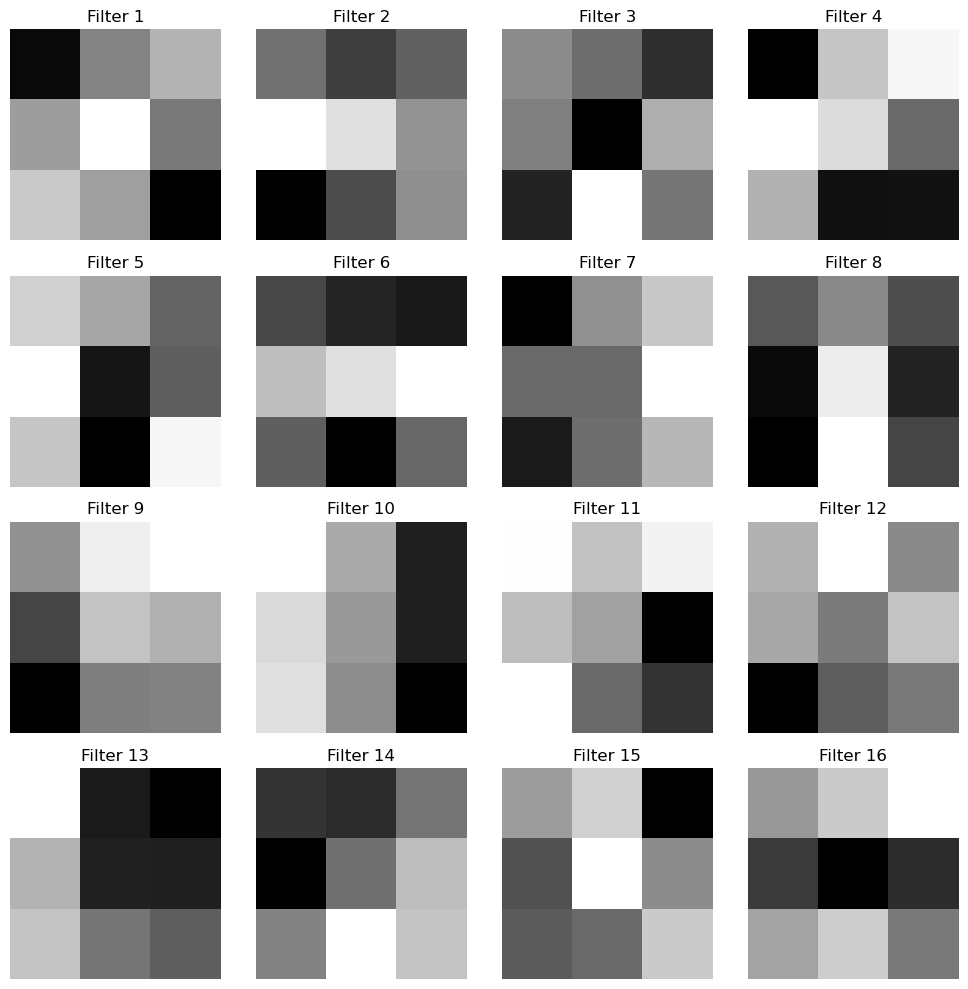

In [25]:
# Visualize filters from the first convolutional layer of the CNN model

# Get the weights of the first convolutional layer
first_conv_layer_weights = model_cnn.conv1.weight.data.cpu().numpy()

# Normalizing helps bring all filter values to a common scale between 0 and 1
min_w = np.min(first_conv_layer_weights)  # the minimum value in the weights
max_w = np.max(first_conv_layer_weights)  # the maximum value in the weights
first_conv_layer_weights = (first_conv_layer_weights - min_w)/(max_w - min_w) #normalization

# We’ll display up to 16 filters for clarity
num_filters = 32 
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_plots):
    filter_img = np.mean(first_conv_layer_weights[i], axis=0) 
    axes[i].imshow(filter_img, cmap='gray')
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **Step - 14 (Data Augmentation)**
Data augmentation is a technique used to increase the diversity of the training dataset by applying random transformations such as rotations, flips, and crops to the images. This helps to prevent overfitting and can improve the generalization ability of the model. We will apply data augmentation to the training data and retrain the CNN model to see if it improves performance.

In [26]:
# Define data augmentation transformations
train_transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset with data augmentation
train_dataset_augmented = torchvision.datasets.CIFAR10(root='D:/Deep Learning Bootcamp/Computer Vision/Week2/Train_data', train=True,
                                                      download=True, transform=train_transform_augmented)
test_dataset = torchvision.datasets.CIFAR10(root='D:.Deep Learning Bootcamp/Computer Vision/Week2/test_data', train=False,
                                       download=True, transform=transform) # Use the original transform for testing

train_loader_augmented = DataLoader(dataset=train_dataset_augmented, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

model_cnn_augmented = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_augmented = optim.Adam(model_cnn.parameters(), lr=0.001)

print("Training CNN with Data Augmentation...")

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_augmented):

        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_cnn_augmented(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer_augmented.zero_grad()
        loss.backward()
        optimizer_augmented.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_augmented)}], Loss: {loss.item():.4f}")

Files already downloaded and verified


100%|██████████| 170M/170M [00:16<00:00, 10.3MB/s] 


Extracting D:.Deep Learning Bootcamp/Computer Vision/Week2/test_data\cifar-10-python.tar.gz to D:.Deep Learning Bootcamp/Computer Vision/Week2/test_data
Training CNN with Data Augmentation...
Epoch [1/10], Step [100/782], Loss: 2.3012
Epoch [1/10], Step [200/782], Loss: 2.2922
Epoch [1/10], Step [300/782], Loss: 2.3102
Epoch [1/10], Step [400/782], Loss: 2.2980
Epoch [1/10], Step [500/782], Loss: 2.2951
Epoch [1/10], Step [600/782], Loss: 2.2872
Epoch [1/10], Step [700/782], Loss: 2.3019
Epoch [2/10], Step [100/782], Loss: 2.3004
Epoch [2/10], Step [200/782], Loss: 2.2921
Epoch [2/10], Step [300/782], Loss: 2.3031
Epoch [2/10], Step [400/782], Loss: 2.2995
Epoch [2/10], Step [500/782], Loss: 2.3028
Epoch [2/10], Step [600/782], Loss: 2.2919
Epoch [2/10], Step [700/782], Loss: 2.2882
Epoch [3/10], Step [100/782], Loss: 2.2991
Epoch [3/10], Step [200/782], Loss: 2.3070
Epoch [3/10], Step [300/782], Loss: 2.2984
Epoch [3/10], Step [400/782], Loss: 2.2980
Epoch [3/10], Step [500/782], Loss

### **Step - 15 (Visualize Incorrect Predictions)**
Visualizing some of the images that the CNN model misclassified can provide valuable insights into the model's weaknesses and help identify areas for improvement. This step will display a few examples of images where the model's predicted label does not match the true label.

number of incorrect_images: 8764 


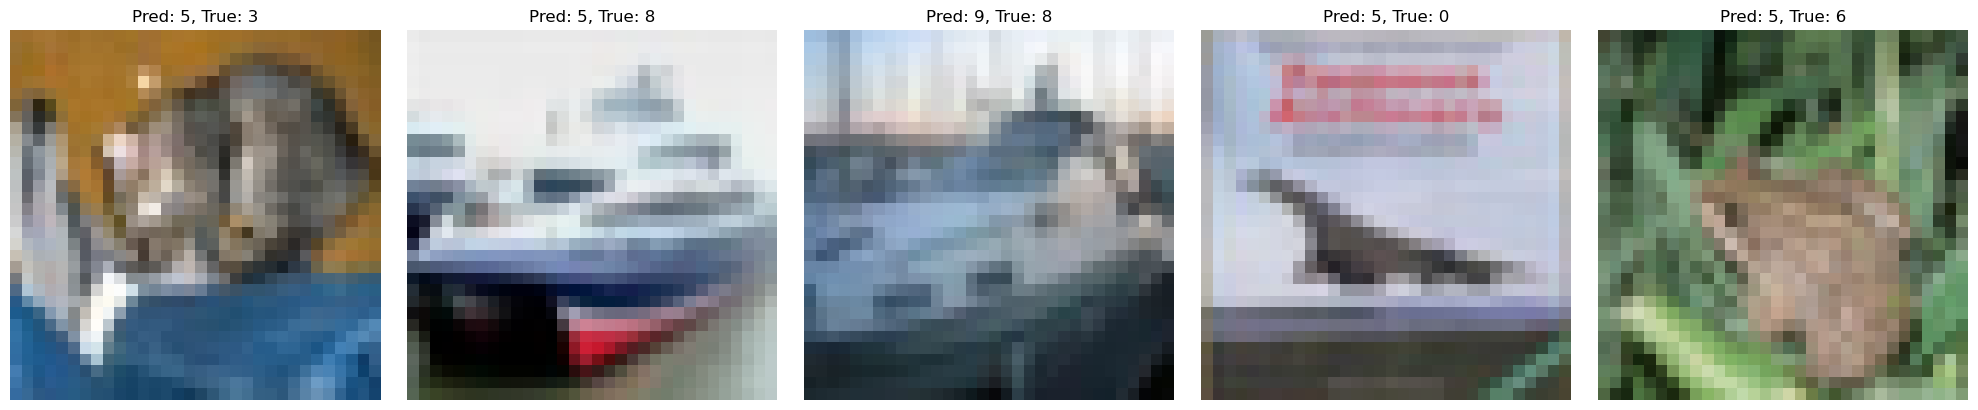

In [ ]:
# Visualize some incorrect predictions from the CNN model
model_to_evaluate = model_cnn_augmented
model_to_evaluate.eval()


incorrect_preds = []
incorrect_labels = []
incorrect_images = []

with torch.no_grad():
    for images, labels in test_loader:
        images_cpu = images.detach().cpu()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_cnn_augmented(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_preds.append(predicted[i].item())
                incorrect_labels.append(labels[i].item())
                # Denormalize the image before storing
                img = images_cpu[i].numpy().transpose((1, 2, 0))
                img = 0.5 * img + 0.5 # Denormalize
                img = np.clip(img, 0, 1)
                incorrect_images.append(img)
                

# Display up to 5 incorrect predictions
print(f"number of incorrect_images: {len(incorrect_images)} ")
num_to_display = min(len(incorrect_images), 5)
fig, axes = plt.subplots(nrows=1, ncols=num_to_display, figsize=(20, 4))

if num_to_display > 0:
    for i in range(num_to_display):
        axes[i].imshow(incorrect_images[i])
        axes[i].set_title(f'Pred: {incorrect_preds[i]}, True: {incorrect_labels[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions to display.")